### Library Imports

In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

##### Parameters

In [55]:
# minmax or standard
SCALER = 'minmax'

### a. Understanding the dataset:

##### 1. Import the dataset in a notebook environment with python library : “Pandas”

In [56]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


##### 2. Show the number of attributes (columns) and number of records (rows)

In [57]:
df.shape

(1470, 35)

##### 3. Show the statistics of the dataset ( column wise mean, standard deviation, max, min etc)

In [58]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


##### 4. Count the number of missing values in the dataset

In [59]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

##### 5. Count the number of duplicate values in the dataset.

In [60]:
df.duplicated().sum()

0

### b. Data cleaning:

##### 1. If you find any missing values in the dataset ( nan values) replace those data with the column wise mean.

In [61]:
df.fillna(df.select_dtypes(include='number').mean(), inplace=True)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [62]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

##### 2. If you find any duplicates in the dataset, keep just one copy of the data.

In [63]:
df.drop_duplicates(inplace=True)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [64]:
df.duplicated().sum()

0

##### 3. Remember, if any row in the target column (Attrition) is missing, you must drop that row

In [65]:
df.dropna(subset=['Attrition'], inplace=True)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [66]:
df['Attrition'].isnull().sum()

0

### c. Creation of input and output features:

##### 1. You need to split the data into two parts. The “Features” variable will consist of all the columns in the dataset except the target column. And the “Labels” variable will contain only the column.

In [67]:
features = df.drop('Attrition', axis=1)
labels = df['Attrition']

In [68]:
features

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [69]:
labels

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

### d. Conversion of features into numeric values:

In [70]:
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)
encoded_labels = pd.DataFrame({'Attrition': encoded_labels})
encoded_labels

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


In [71]:
# mark discreet labels as Categorical as well
categorical_columns = features.columns[features.nunique() <= 20]

for col in categorical_columns:
    features[col] = features[col].astype('category')

features.dtypes

Age                            int64
BusinessTravel              category
DailyRate                      int64
Department                  category
DistanceFromHome               int64
Education                   category
EducationField              category
EmployeeCount               category
EmployeeNumber                 int64
EnvironmentSatisfaction     category
Gender                      category
HourlyRate                     int64
JobInvolvement              category
JobLevel                    category
JobRole                     category
JobSatisfaction             category
MaritalStatus               category
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked          category
Over18                      category
OverTime                    category
PercentSalaryHike           category
PerformanceRating           category
RelationshipSatisfaction    category
StandardHours               category
StockOptionLevel            category
T

In [72]:
encoded_features = pd.get_dummies(features, drop_first=True, dtype=int)
encoded_features

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany,BusinessTravel_Travel_Frequently,...,YearsWithCurrManager_8,YearsWithCurrManager_9,YearsWithCurrManager_10,YearsWithCurrManager_11,YearsWithCurrManager_12,YearsWithCurrManager_13,YearsWithCurrManager_14,YearsWithCurrManager_15,YearsWithCurrManager_16,YearsWithCurrManager_17
0,41,1102,1,1,94,5993,19479,8,6,0,...,0,0,0,0,0,0,0,0,0,0
1,49,279,8,2,61,5130,24907,10,10,1,...,0,0,0,0,0,0,0,0,0,0
2,37,1373,2,4,92,2090,2396,7,0,0,...,0,0,0,0,0,0,0,0,0,0
3,33,1392,3,5,56,2909,23159,8,8,1,...,0,0,0,0,0,0,0,0,0,0
4,27,591,2,7,40,3468,16632,6,2,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2061,41,2571,12290,17,5,1,...,0,0,0,0,0,0,0,0,0,0
1466,39,613,6,2062,42,9991,21457,9,7,0,...,0,0,0,0,0,0,0,0,0,0
1467,27,155,4,2064,87,6142,5174,6,6,0,...,0,0,0,0,0,0,0,0,0,0
1468,49,1023,2,2065,63,5390,13243,17,9,1,...,1,0,0,0,0,0,0,0,0,0


### e. Scaling of the features:

In [73]:
scaler = MinMaxScaler() if SCALER == 'minmax'  else StandardScaler()

# Only scale columns with continuous values
cols = encoded_features.columns[encoded_features.nunique() > 2]
cols

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate',
       'MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany'],
      dtype='object')

In [74]:
encoded_features[cols] = scaler.fit_transform(encoded_features[cols])
encoded_features

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany,BusinessTravel_Travel_Frequently,...,YearsWithCurrManager_8,YearsWithCurrManager_9,YearsWithCurrManager_10,YearsWithCurrManager_11,YearsWithCurrManager_12,YearsWithCurrManager_13,YearsWithCurrManager_14,YearsWithCurrManager_15,YearsWithCurrManager_16,YearsWithCurrManager_17
0,0.547619,0.715820,0.000000,0.000000,0.914286,0.262454,0.698053,0.200,0.150,0,...,0,0,0,0,0,0,0,0,0,0
1,0.738095,0.126700,0.250000,0.000484,0.442857,0.217009,0.916001,0.250,0.250,1,...,0,0,0,0,0,0,0,0,0,0
2,0.452381,0.909807,0.035714,0.001451,0.885714,0.056925,0.012126,0.175,0.000,0,...,0,0,0,0,0,0,0,0,0,0
3,0.357143,0.923407,0.071429,0.001935,0.371429,0.100053,0.845814,0.200,0.200,1,...,0,0,0,0,0,0,0,0,0,0
4,0.214286,0.350036,0.035714,0.002903,0.142857,0.129489,0.583738,0.150,0.050,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.559771,0.785714,0.996613,0.157143,0.082254,0.409396,0.425,0.125,1,...,0,0,0,0,0,0,0,0,0,0
1466,0.500000,0.365784,0.178571,0.997097,0.171429,0.472986,0.777474,0.225,0.175,0,...,0,0,0,0,0,0,0,0,0,0
1467,0.214286,0.037938,0.107143,0.998065,0.814286,0.270300,0.123670,0.150,0.150,0,...,0,0,0,0,0,0,0,0,0,0
1468,0.738095,0.659270,0.035714,0.998549,0.471429,0.230700,0.447661,0.425,0.225,1,...,1,0,0,0,0,0,0,0,0,0


In [75]:
features = encoded_features
labels = encoded_labels

### f. Correlation Analysis:

In [76]:

correlations = features.corrwith(labels['Attrition'])
top20_features = correlations.abs().sort_values(ascending=False).head(20).index
top_features = features[top20_features]
correlations[top20_features]

OverTime_Yes                         0.246118
MaritalStatus_Single                 0.175419
TotalWorkingYears                   -0.171063
MonthlyIncome                       -0.159840
Age                                 -0.159205
JobRole_Sales Representative         0.157234
StockOptionLevel_1                  -0.151049
YearsAtCompany                      -0.134392
JobLevel_2                          -0.131138
BusinessTravel_Travel_Frequently     0.115143
JobRole_Laboratory Technician        0.098290
MaritalStatus_Married               -0.090984
JobRole_Research Director           -0.088870
JobSatisfaction_4                   -0.087830
JobLevel_4                          -0.086461
Department_Research & Development   -0.085293
JobRole_Manager                     -0.083316
JobRole_Manufacturing Director      -0.082994
Department_Sales                     0.080855
StockOptionLevel_2                  -0.080472
dtype: float64

##### Correlation Matrix

In [132]:
top_features.corr()

,OverTime_Yes,MaritalStatus_Single,TotalWorkingYears,MonthlyIncome,Age,JobRole_Sales Representative,StockOptionLevel_1,YearsAtCompany,JobLevel_2,BusinessTravel_Travel_Frequently,JobRole_Laboratory Technician,MaritalStatus_Married,JobRole_Research Director,JobSatisfaction_4,JobLevel_4,Department_Research & Development,JobRole_Manager,JobRole_Manufacturing Director,Department_Sales,StockOptionLevel_2
OverTime_Yes,1.000000,-0.006498,0.012754,0.006089,0.028062,0.003347,-0.005118,-0.011687,-0.016072,0.029392,-0.044774,-0.013502,0.002400,0.039452,0.017531,-0.003036,-0.011086,-0.010302,0.005864,-0.032732
MaritalStatus_Single,-0.006498,1.000000,-0.089529,-0.089361,-0.119185,0.072439,-0.566130,-0.070935,-0.029524,0.027734,0.019873,-0.629981,-0.042299,0.032247,-0.038860,-0.009990,-0.055176,-0.021331,0.033002,-0.237909
TotalWorkingYears,0.012754,-0.089529,1.000000,0.772893,0.680381,-0.207726,0.096791,0.628133,-0.083161,-0.012177,-0.215426,0.053512,0.312148,-0.007801,0.508648,0.011087,0.465837,0.064077,-0.014781,-0.043818
MonthlyIncome,0.006089,-0.089361,0.772893,1.000000,0.497855,-0.201514,0.090711,0.514285,-0.160595,-0.031658,-0.320906,0.056767,0.485818,-0.004324,0.533144,-0.064720,0.619573,0.055684,0.063978,-0.024362
Age,0.028062,-0.119185,0.680381,0.497855,1.000000,-0.175785,0.107176,0.311309,-0.026844,-0.024743,-0.143176,0.083919,0.185891,-0.009489,0.323999,0.017883,0.294248,0.049726,-0.027549,-0.028130
JobRole_Sales Representative,0.003347,0.072439,-0.207726,-0.201514,-0.175785,1.000000,-0.027924,-0.163464,-0.141874,0.055469,-0.113130,-0.023659,-0.058687,-0.018548,-0.068194,-0.336127,-0.066797,-0.080924,0.370667,-0.018281
StockOptionLevel_1,-0.005118,-0.566130,0.096791,0.090711,0.107176,-0.027924,1.000000,0.082832,-0.027386,0.005997,0.018149,0.356351,-0.008767,-0.000293,0.032263,0.009814,0.085304,0.005627,-0.017562,-0.286569
YearsAtCompany,-0.011687,-0.070935,0.628133,0.514285,0.311309,-0.163464,0.082832,1.000000,-0.031493,0.012991,-0.150181,0.044925,0.153918,-0.004973,0.313099,-0.032181,0.330965,0.031968,0.029805,-0.012297
JobLevel_2,-0.016072,-0.029524,-0.083161,-0.160595,-0.026844,-0.141874,-0.027386,-0.031493,1.000000,0.012209,-0.141400,0.018518,-0.181205,0.016059,-0.210561,-0.202452,-0.206248,0.177066,0.239936,0.116929
BusinessTravel_Travel_Frequently,0.029392,0.027734,-0.012177,-0.031658,-0.024743,0.055469,0.005997,0.012991,0.012209,1.000000,0.010023,-0.030785,-0.023579,0.024431,-0.006551,0.003340,-0.042583,0.009783,-0.000160,-0.009957


##### 1D Scatter Plot

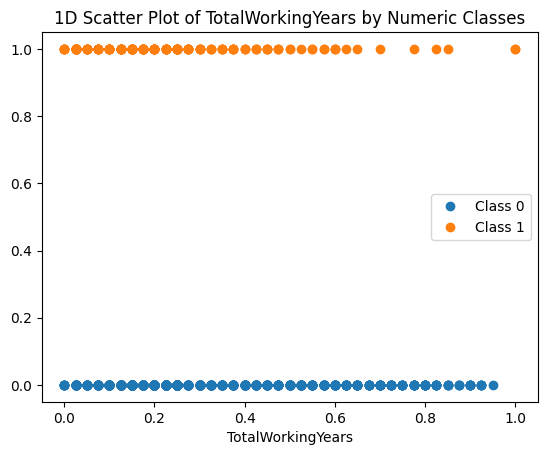

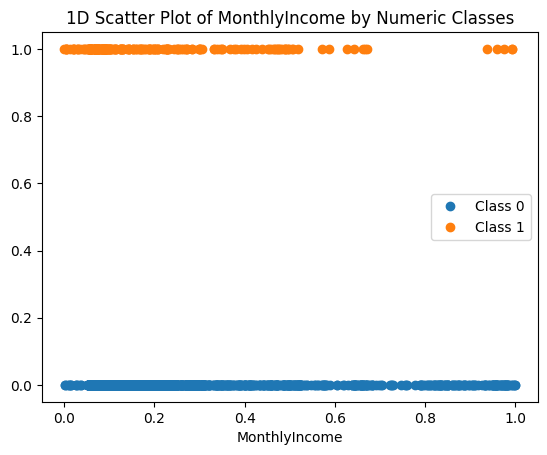

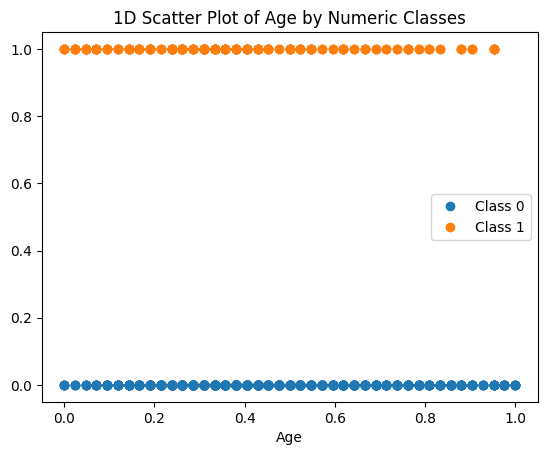

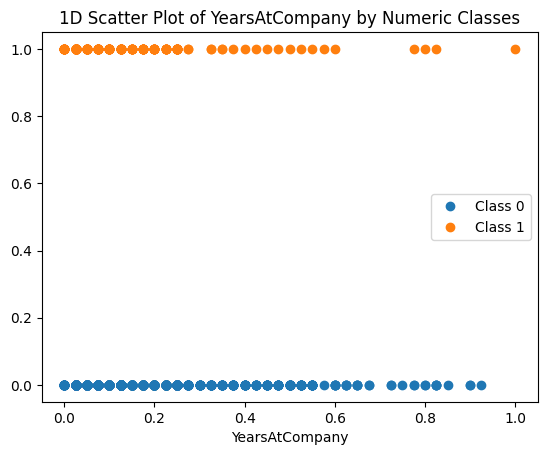

In [78]:
import matplotlib.pyplot as plt
import numpy as np 

class_0 = features.loc[labels["Attrition"] == 0]
class_1 = features.loc[labels["Attrition"] == 1]

for col in top20_features:   
    # only show non-binary columns
    if encoded_features[col].nunique() > 2:
        # seperate two classes to prevent overlapping
        plt.plot(class_0[col], np.zeros_like(class_0[col]), 'o', label='Class 0')
        plt.plot(class_1[col], np.ones_like(class_1[col]), 'o', label='Class 1')

        plt.legend()
        plt.xlabel(col)
        plt.title(f"1D Scatter Plot of {col} by Numeric Classes")
        plt.show()

### g. Validating the pipeline (Bonus Task):

In [122]:
X_train, X_test, y_train, y_test = train_test_split(top_features, labels, test_size=0.2, random_state=42)
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression classifier: {accuracy:.2f}")

Accuracy of Logistic Regression classifier: 0.88


/home/risenfromashes/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### *. Neural network with full features:

In [129]:
import torch
import torch.nn as nn

In [133]:

class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(features.shape[1], 256),
            nn.ReLU(),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.fc(x)

    def loss_fn(self, y_pred, y_true):
        return nn.BCELoss()(y_pred, y_true)
    

model = Classifier()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


kf = KFold(n_splits=10, shuffle=True, random_state=42)
accuracies = []
for train_index, test_index in kf.split(features):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = labels.iloc[train_index], labels.iloc[test_index]

    X_train = torch.tensor(X_train.values, dtype=torch.float32)
    X_test = torch.tensor(X_test.values, dtype=torch.float32)
    y_train = torch.tensor(y_train.values, dtype=torch.float32)
    y_test = torch.tensor(y_test.values, dtype=torch.float32)

    for epoch in range(100):
        optimizer.zero_grad()
        y_pred = model(X_train)
        loss = model.loss_fn(y_pred, y_train)
        loss.backward()
        optimizer.step()

    y_pred = model(X_test)
    y_pred = torch.round(y_pred)
    accuracy = accuracy_score(y_test, y_pred.detach().numpy())
    accuracies.append(accuracy)

print(f"Accuracy of Neural Network classifier: {np.mean(accuracies):.2f}")

Accuracy of Neural Network classifier: 0.98
